In [644]:
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

# 1. Read the data as an appropriate Time Series data and plot the data.

In [645]:
df= pd.read_csv('Sparkling.csv')
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [646]:
#importing Data
df  = pd.read_csv('Sparkling.csv', index_col = 0, parse_dates = True)
df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [647]:
df.tail()

,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


In [648]:
df.shape

(187, 1)

In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [650]:
df.isna().sum()

Sparkling    0
dtype: int64

In [651]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


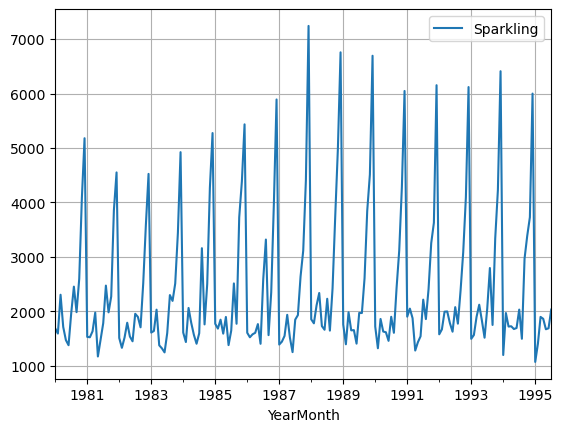

In [652]:
df.plot()
plt.grid()

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

# Exploratory Data Analysis

Plot a year on year boxplot for the Sparkling wine Sales

# Yearly Boxplot

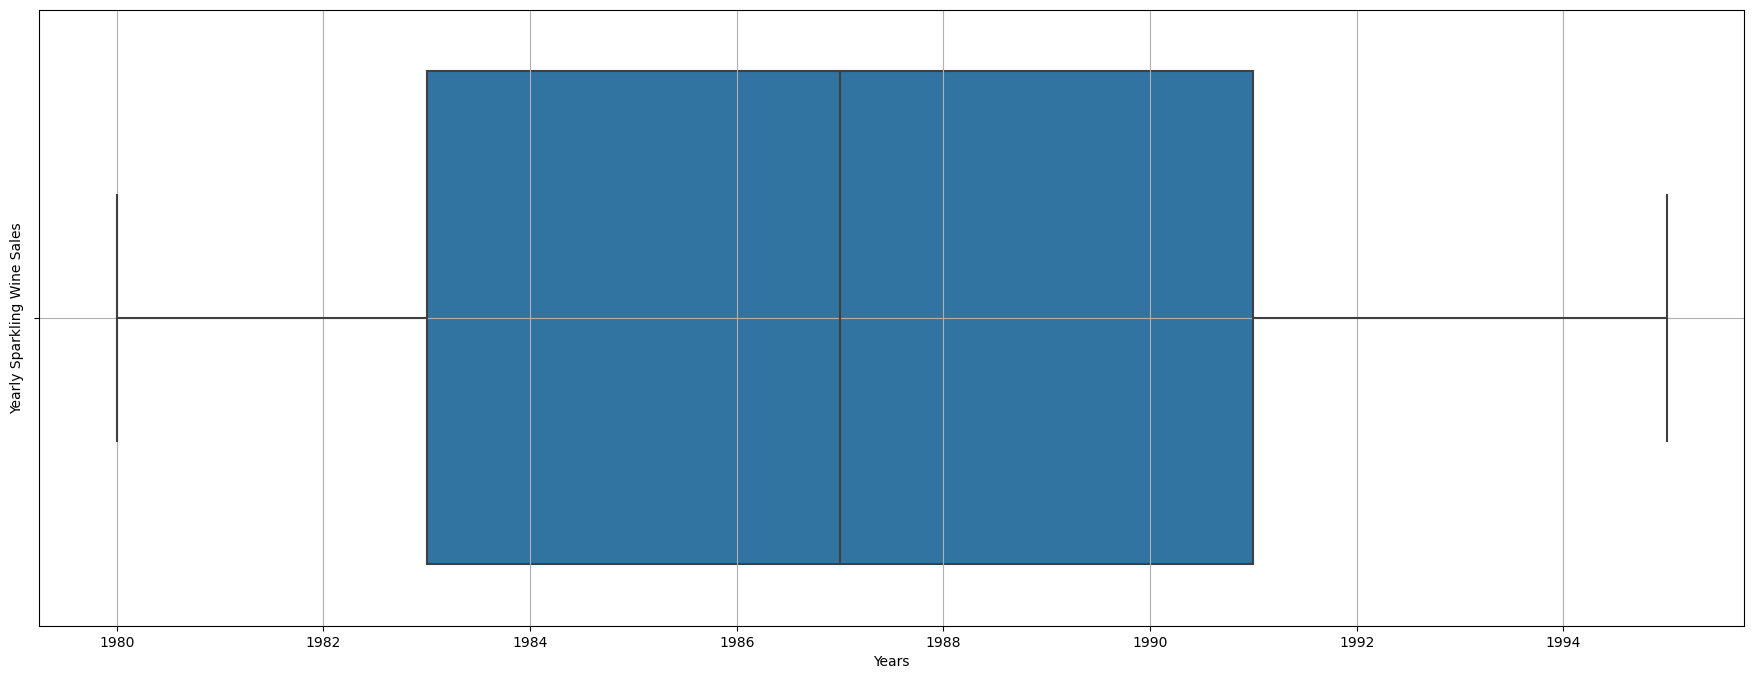

In [653]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.year, data=df, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Sparkling Wine Sales');

Plot a monthly boxplot for Sparkling Wine Sales taking all the years into account

# Monthly Plot

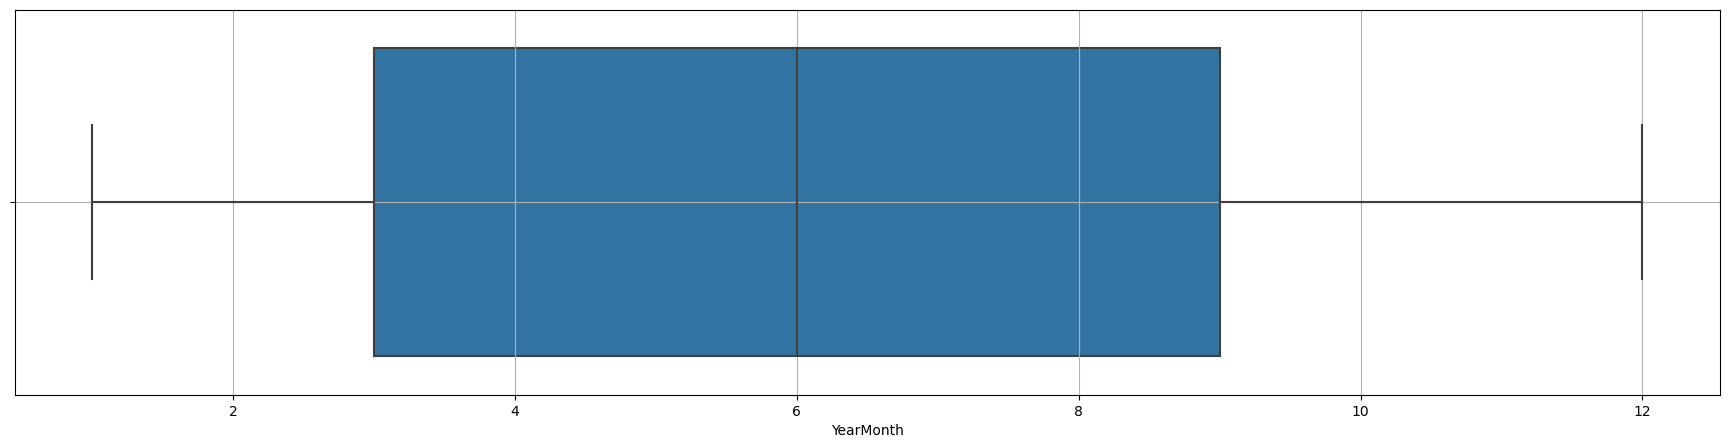

In [654]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(x=df.index.month, data=df, ax=ax,whis=1.5)
plt.grid();

Plot a monthplot of the give Time Series

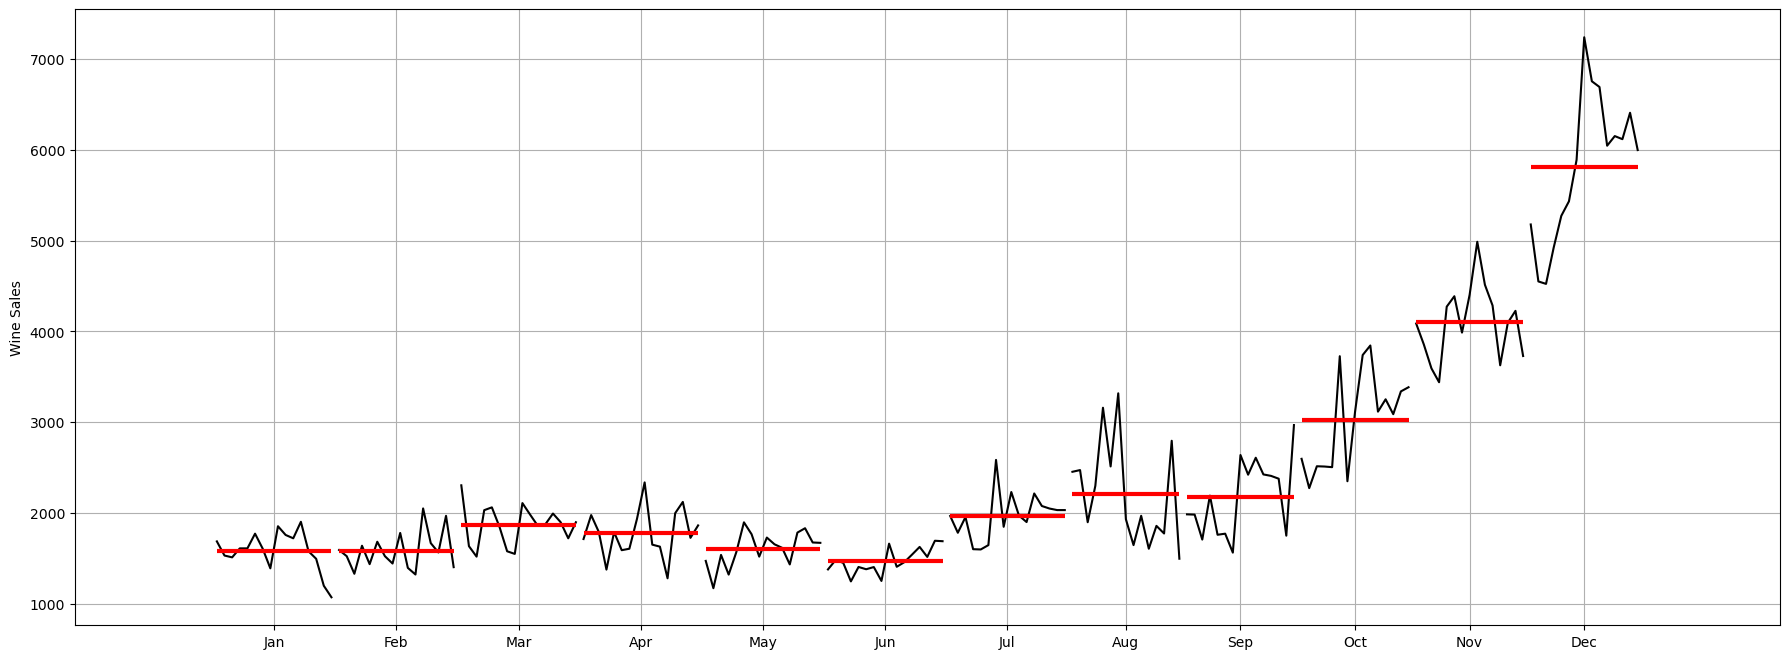

In [655]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Wine Sales',ax=ax)
plt.grid();

# Plot a graph of monthly sales across years.

In [656]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


In [657]:
def highlight_max(s):
    is_max = s == s.max()
    return ['backgroud-color: yellow' if v else '' for v in is_max]

In [658]:
highlighted_data = monthly_sales_across_years.style.apply(highlight_max,axis =0)

In [659]:
highlighted_data = highlighted_data.format('{:.0f}')

In [660]:
highlighted_data

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,1686,1591,2304,1712,1471,1377,1966,2453,1984,2596,4087,5179
1981,1530,1523,1633,1976,1170,1480,1781,2472,1981,2273,3857,4551
1982,1510,1329,1518,1790,1537,1449,1954,1897,1706,2514,3593,4524
1983,1609,1638,2030,1375,1320,1245,1600,2298,2191,2511,3440,4923
1984,1609,1435,2061,1789,1567,1404,1597,3159,1759,2504,4273,5274
1985,1771,1682,1846,1589,1896,1379,1645,2512,1771,3727,4388,5434
1986,1606,1523,1577,1605,1765,1403,2584,3318,1562,2349,3987,5891
1987,1389,1442,1548,1935,1518,1250,1847,1930,2638,3114,4405,7242
1988,1853,1779,2108,2336,1728,1661,2230,1645,2421,3740,4988,6757


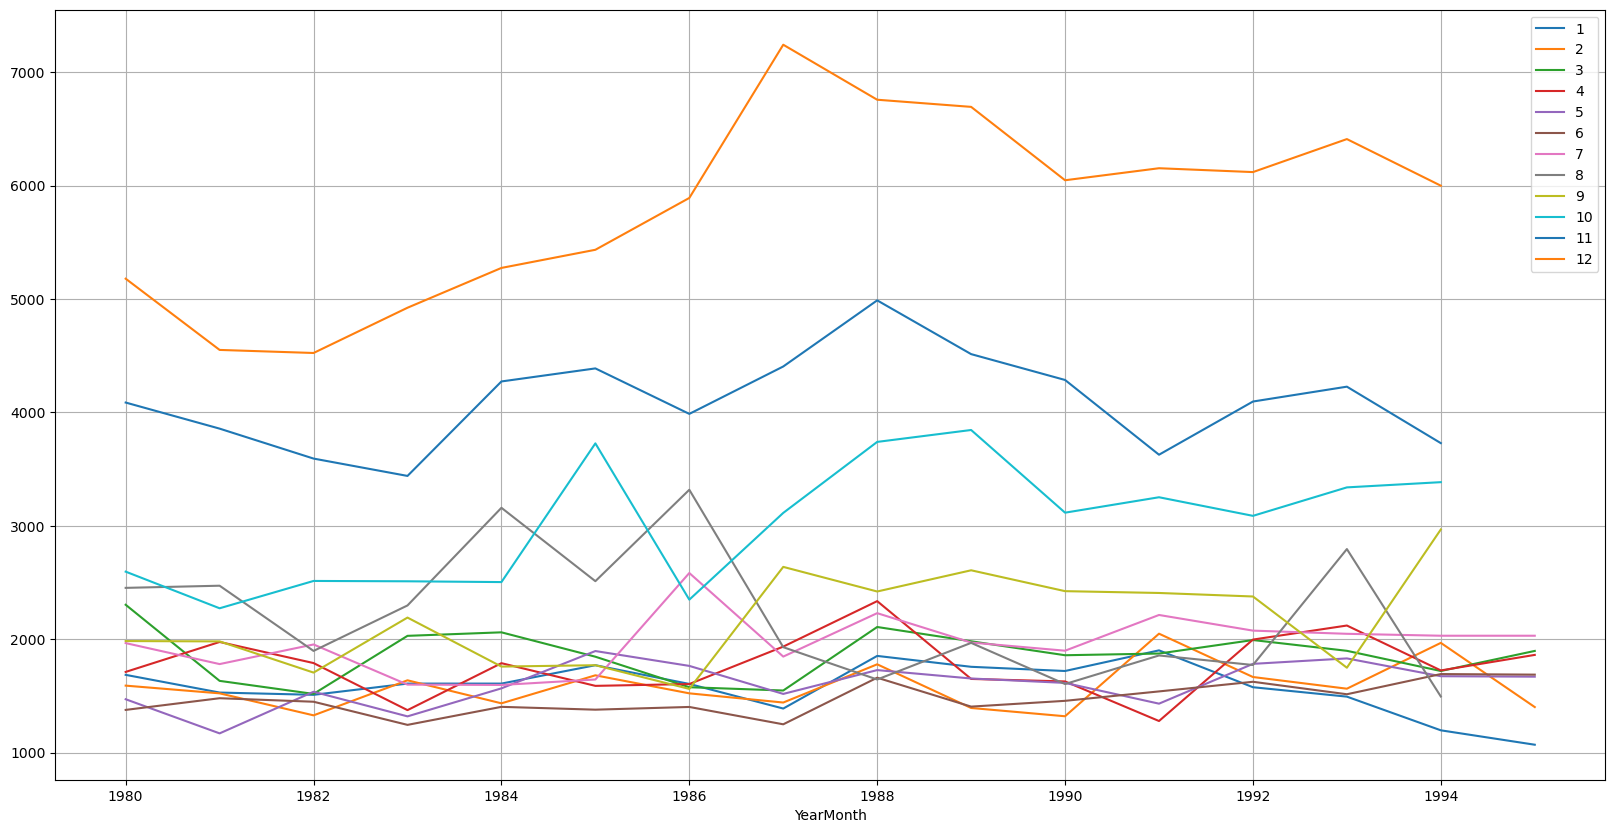

In [661]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

# Plot the Empirical Cumulative Distribution.

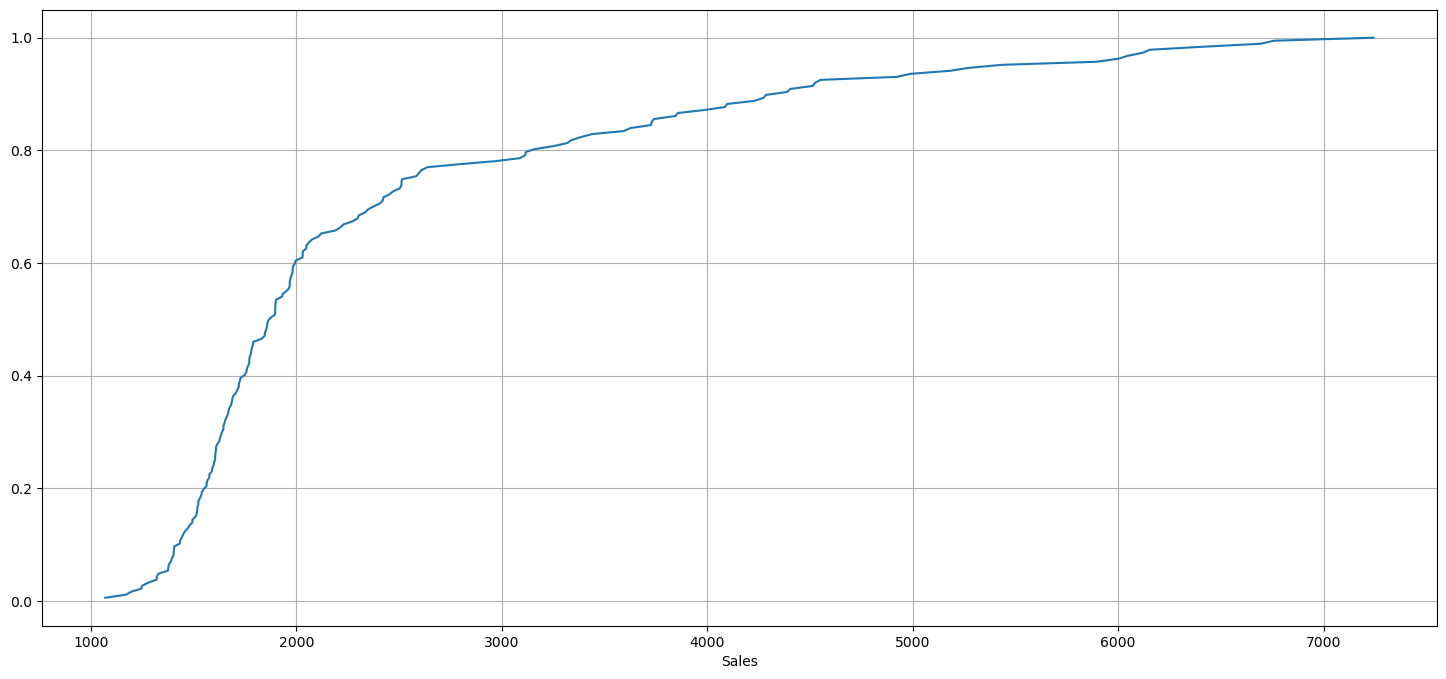

In [662]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

# Plot the average Sales per month and the month on month percentage change of Sales.

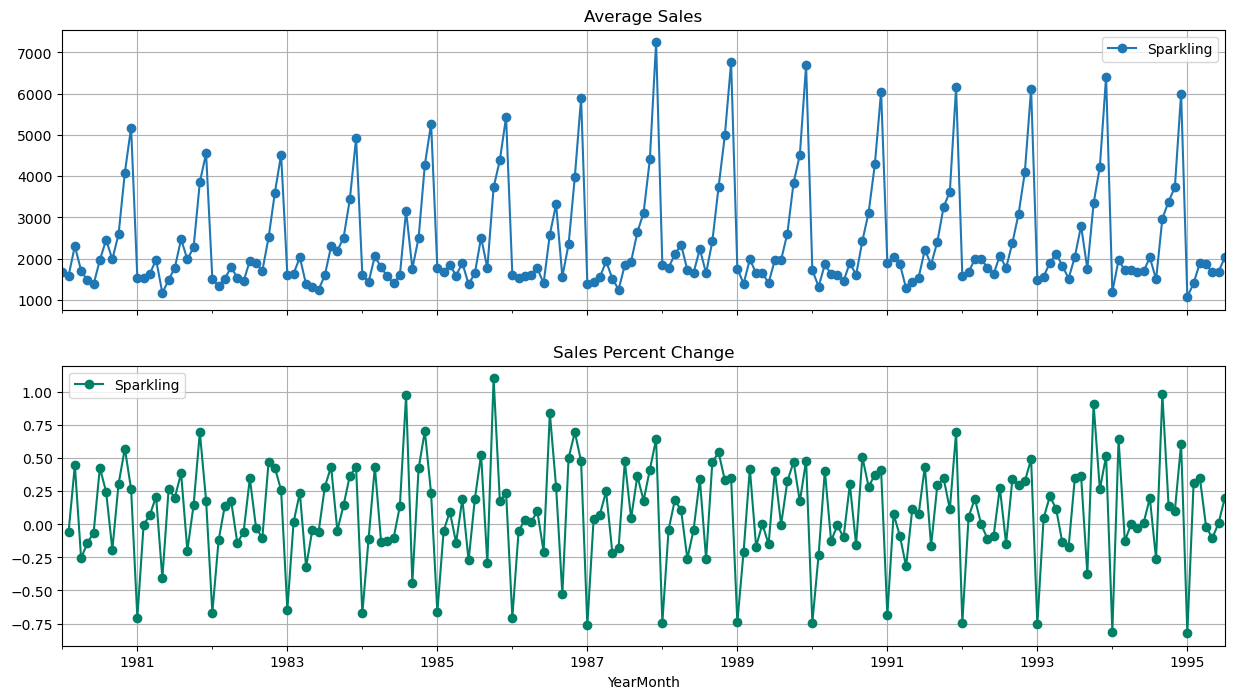

In [663]:
# group by date and get average Sales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

# Decompose the Time Series

# Additive Model

In [664]:
from statsmodels.tsa.seasonal import seasonal_decompose

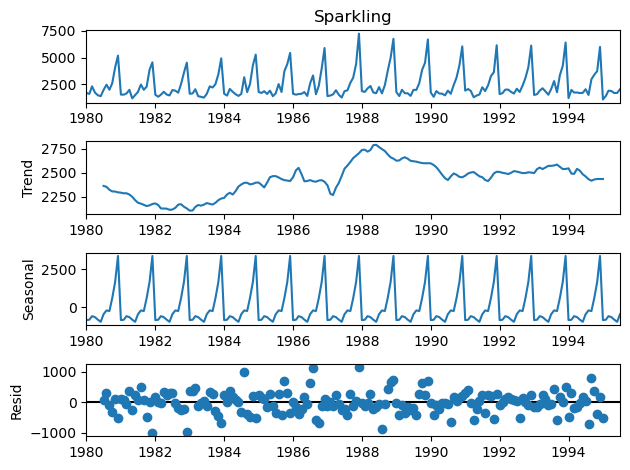

In [665]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

In [666]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


# Multiplicative Model

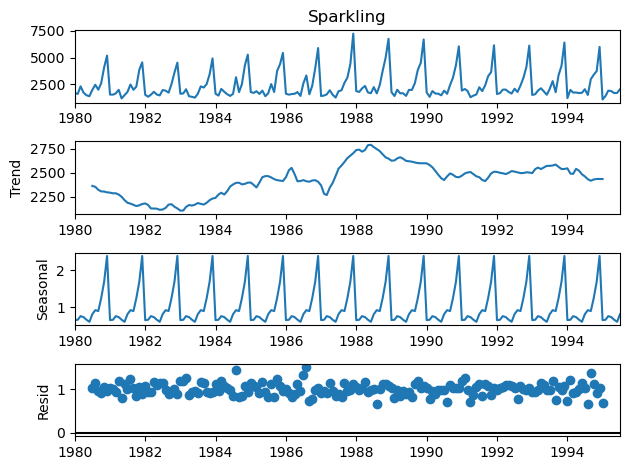

In [667]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [668]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

# 3. Split the data into training and test. The test data should start in 1991.

In [669]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [670]:
train.shape

(132, 1)

In [671]:
test.shape

(55, 1)

In [672]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [673]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


Last few rows of Training Data


,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


First few rows of Test Data


,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


Last few rows of Test Data


,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


# 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

# Model 1: Linear Regression

In [674]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [675]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [676]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



In [677]:
from sklearn.linear_model import LinearRegression

In [678]:
lr = LinearRegression()

In [679]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

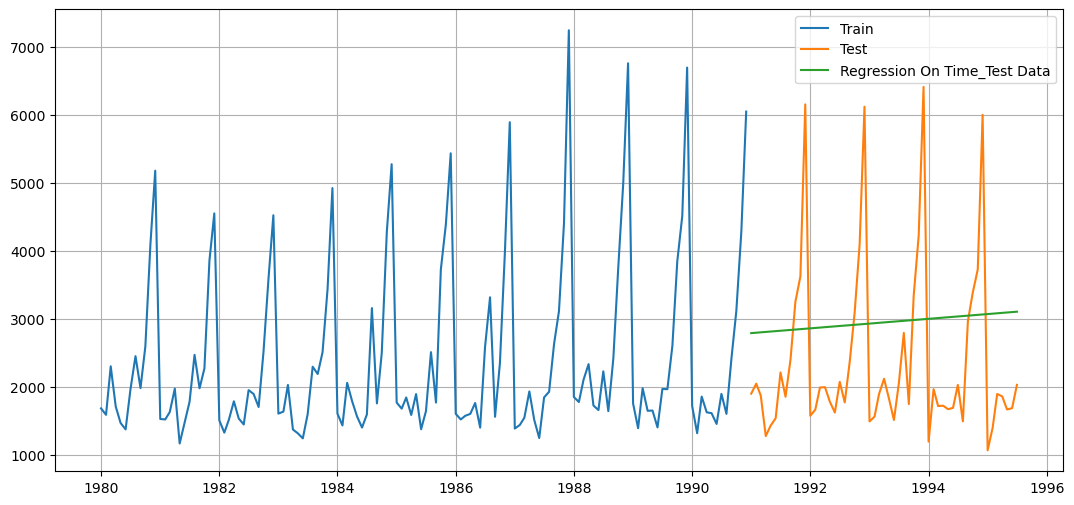

In [680]:
test_predictions_model1  = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [681]:
from sklearn import metrics

# Model Evaluation

In [682]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.14


In [683]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175


# Model 2: Naive Approach:  y^t+1=yt

In [684]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [685]:
train.tail()

,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


In [686]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

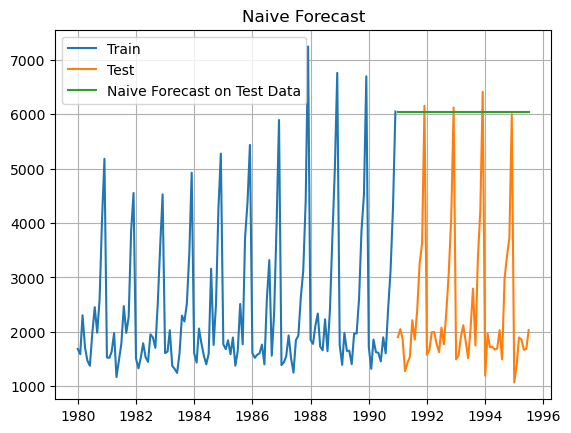

In [687]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

# Model Evaluation

In [688]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [689]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352


# Method 3: Simple Average

In [690]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [691]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


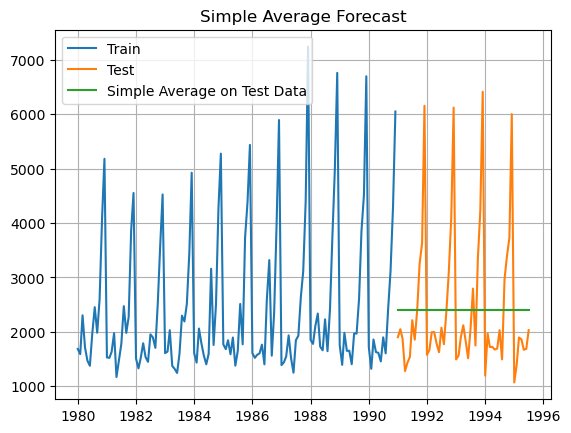

In [692]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

# Model Evaluation

In [693]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [694]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


# Method 4: Moving Average(MA)

In [695]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [696]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


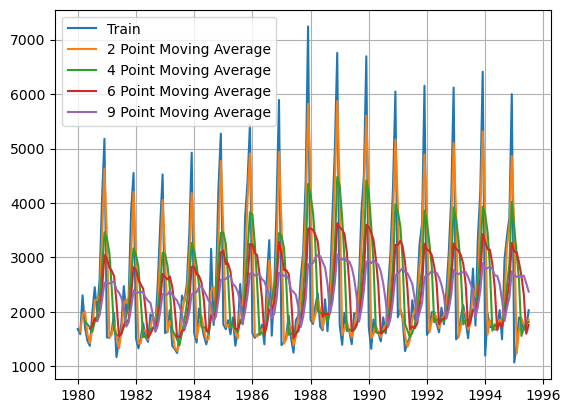

In [697]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [698]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

In [699]:
trailing_MovingAverage_test.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1991-01-01,1902,3974.5,3837.75,3230.000000,2705.666667
1991-02-01,2049,1975.5,3571.00,3304.000000,2753.888889
1991-03-01,1874,1961.5,2968.00,3212.333333,2800.222222
1991-04-01,1279,1576.5,1776.00,2906.166667,2731.333333
1991-05-01,1432,1355.5,1658.50,2430.500000,2712.111111


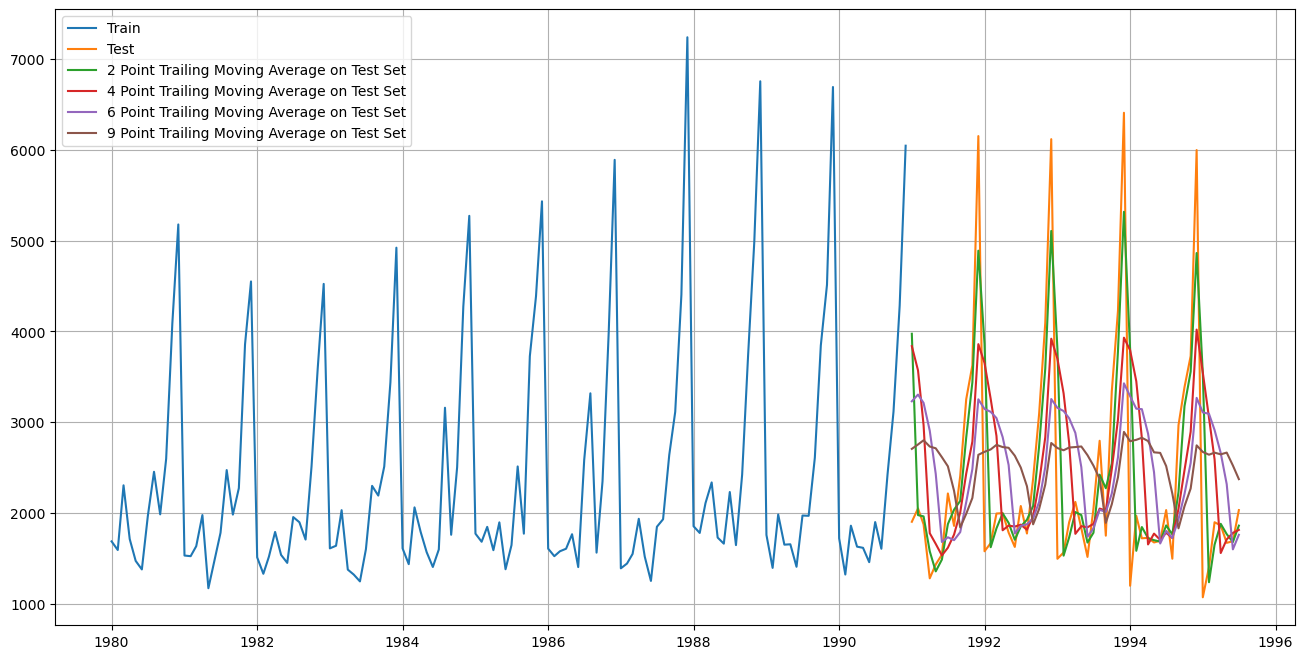

In [700]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

# Model Evaluation

In [701]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [702]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


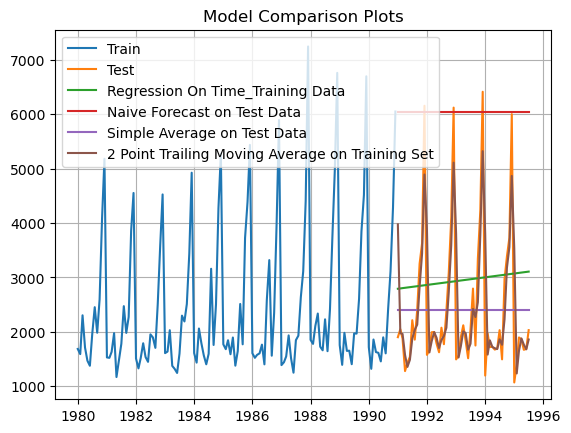

In [703]:
## Plotting on both Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Method 5:Simple Exponential Smoothing

In [704]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [705]:
SES_train = train.copy()
SES_test = test.copy()

In [706]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [707]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [708]:
model_SES_autofit.params

{'smoothing_level': 0.04960659884563118,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047543457245,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [709]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sparkling,predict
YearMonth,,
1991-01-01,1902,2724.929339
1991-02-01,2049,2724.929339
1991-03-01,1874,2724.929339
1991-04-01,1279,2724.929339
1991-05-01,1432,2724.929339


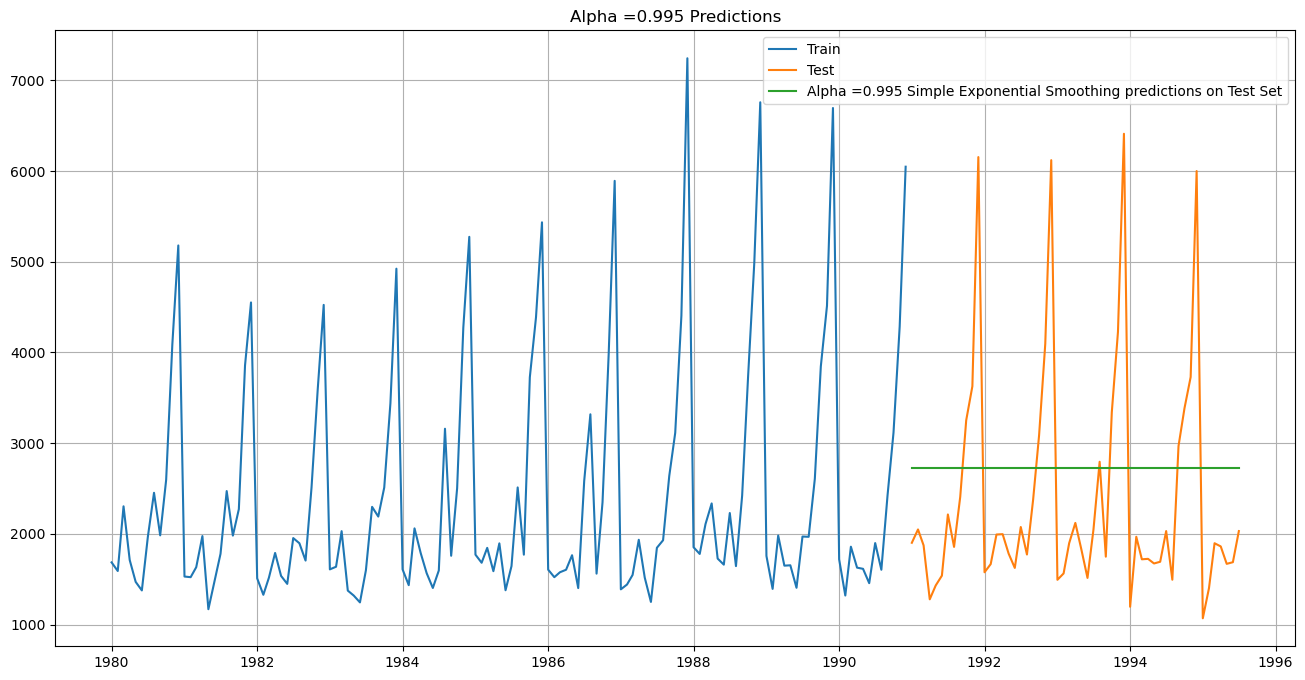

In [710]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

# Model Evaluation for α = 0.995 : Simple Exponential Smoothing

In [711]:
## Test Data
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [712]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674


# Method 6 : Double Exponential Smoothing

In [713]:
DES_train = train.copy()
DES_test = test.copy()

In [714]:
model_DES = Holt(SES_train['Sparkling'])

In [715]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [716]:
model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.688571,True
smoothing_trend,beta,0.000100,True
initial_level,l.0,1686.000000,True
initial_trend,b.0,-95.000000,True


In [717]:
test_predictions_model3 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model3.head()

1991-01-01    5221.278699
1991-02-01    5127.886554
1991-03-01    5034.494409
1991-04-01    4941.102264
1991-05-01    4847.710119
Freq: MS, dtype: float64

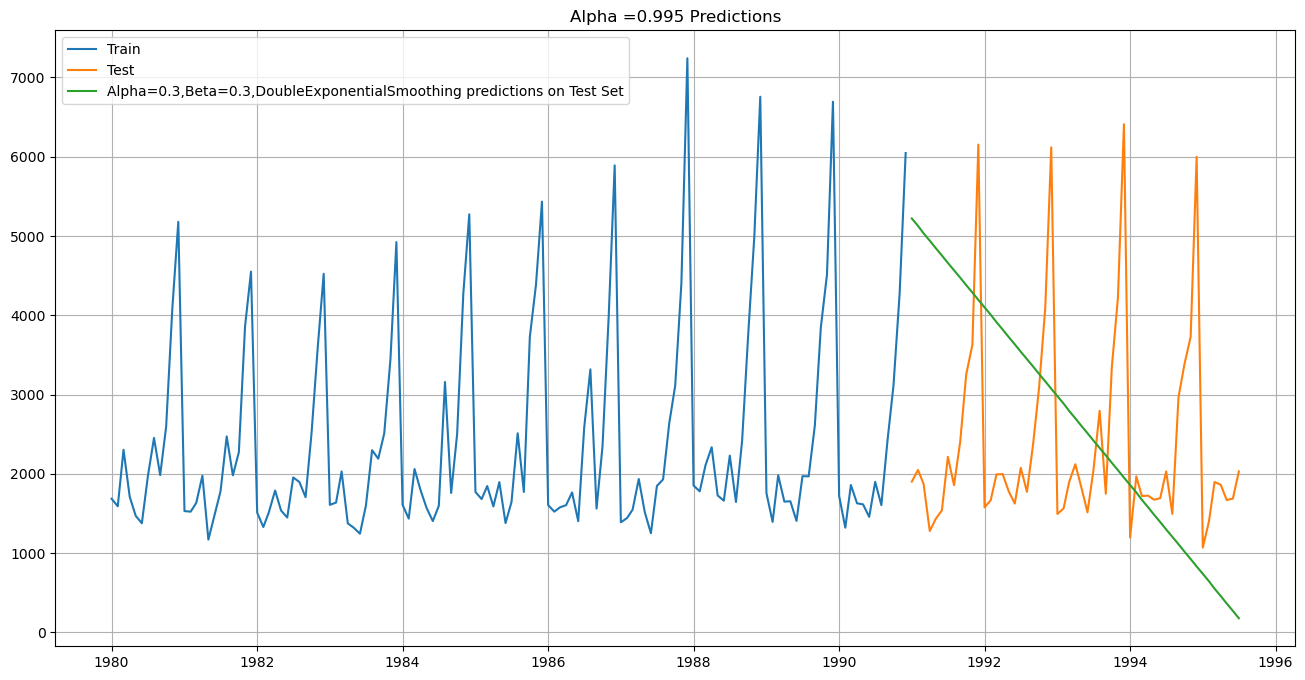

In [718]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(test_predictions_model3, label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [719]:
## Test Data - RMSE

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model3,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 2007.239


In [720]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                              ,index=['Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2007.238526


# Method 7:Triple Exponential Smoothing

In [721]:
TES_train = train.copy()
TES_test = test.copy()

In [722]:
model_TES = ExponentialSmoothing(SES_train['Sparkling'],trend='additive',seasonal='multiplicative')

In [723]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [724]:
model_TES_autofit.params

{'smoothing_level': 0.11194572287706502,
 'smoothing_trend': 0.04979454913988668,
 'smoothing_seasonal': 0.3616765678435302,
 'damping_trend': nan,
 'initial_level': 2356.340229937152,
 'initial_trend': -10.519480221963526,
 'initial_seasons': array([0.71465118, 0.68302129, 0.90263858, 0.80589958, 0.65660325,
        0.65654363, 0.88525948, 1.132562  , 0.92225104, 1.21110112,
        1.8820382 , 2.38194187]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [725]:
test_predictions_model4 = model_TES_autofit.forecast(steps=len(test))
test_predictions_model4.head()

1991-01-01    1586.782642
1991-02-01    1355.896477
1991-03-01    1762.095344
1991-04-01    1655.471900
1991-05-01    1541.320914
Freq: MS, dtype: float64

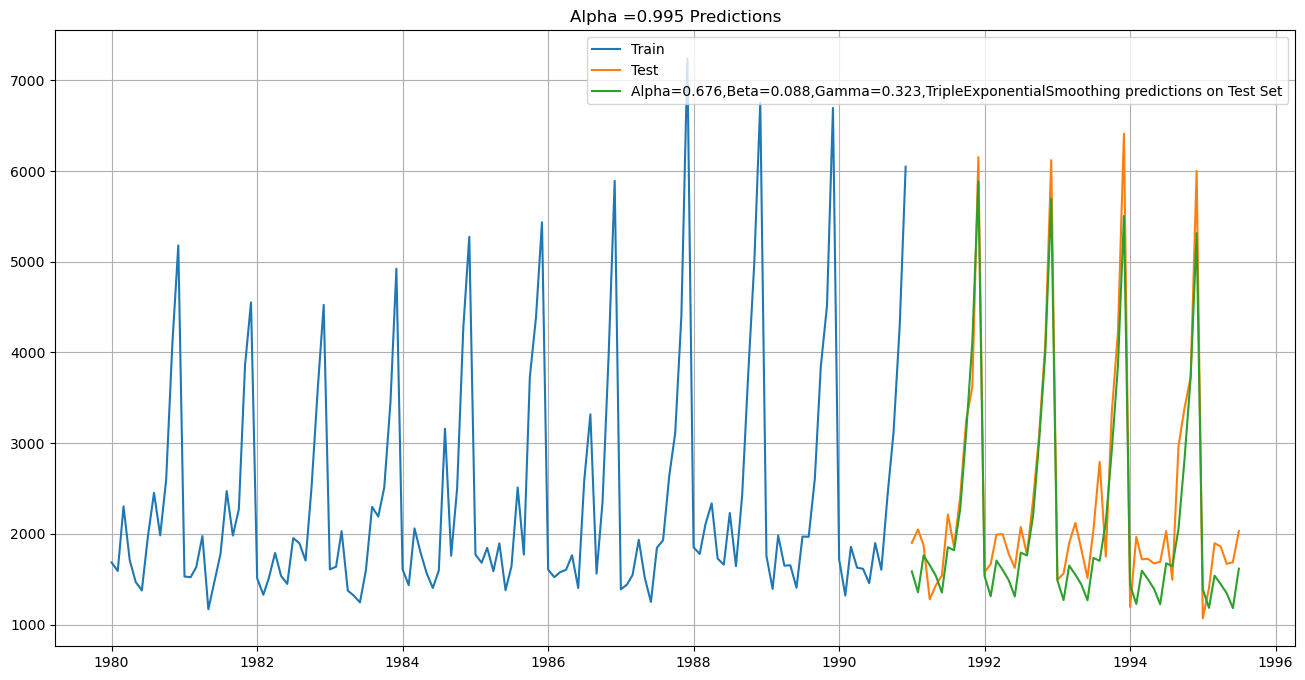

In [726]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(test_predictions_model4, label='Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [727]:
## Test Data - RMSE
rmse_model4_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model4,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 406.510


In [728]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model4_test]}
                              ,index=['Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2007.238526
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",406.510170


# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [729]:
from statsmodels.tsa.stattools import adfuller

In [730]:
dftest = adfuller(df)#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.360
DF test p-value is 0.6011


# OR

In [530]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

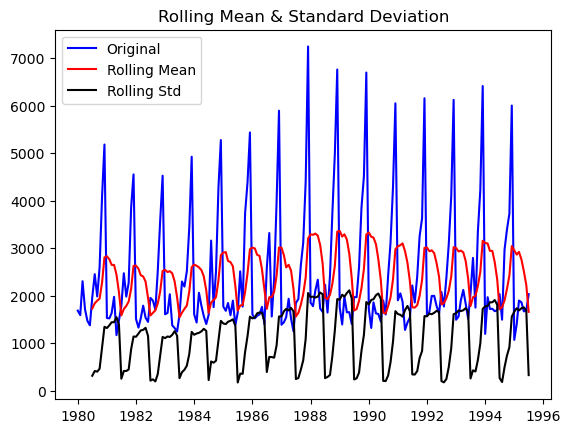

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [531]:
test_stationarity(df['Sparkling'])

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

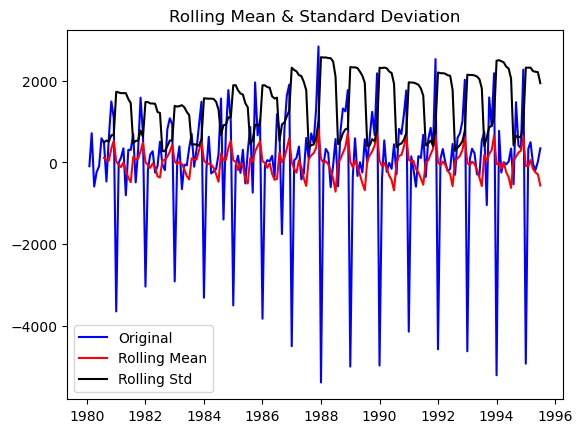

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [532]:
test_stationarity(df['Sparkling'].diff().dropna())

In [617]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 7)
Model: (0, 0, 1)(0, 0, 2, 7)
Model: (0, 0, 2)(1, 0, 0, 7)
Model: (0, 0, 2)(1, 0, 1, 7)


We see that at α = 0.05 the Time Series is indeed stationary.

In [533]:
dftest = adfuller(train['Sparkling'])#Stationarity check on train time series data 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.209
DF test p-value is 0.6697


In [534]:
train_sales_log = np.log10(train['Sparkling'])
#Log transformation on the training data to make the time series stationary as we did with full data
train_sales_log

YearMonth
1980-01-01    3.226858
1980-02-01    3.201670
1980-03-01    3.362482
1980-04-01    3.233504
1980-05-01    3.167613
                ...   
1990-08-01    3.205475
1990-09-01    3.384533
1990-10-01    3.493597
1990-11-01    3.632052
1990-12-01    3.781540
Name: Sparkling, Length: 132, dtype: float64

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

# Auto Regressive(AR) Models

In [535]:
# Define the p parameter to take any value between 0 and 2
p= range(1,4)

In [536]:
# Define the q parameter to take any value between 0 and 2
q = range(1, 4)

 Parameter (p, d, q) estimation matrix for estimating parameters towards building AR / ARMA / ARIMA / SARIMA models             

In [537]:
d= range(0,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [538]:
pdq_ar

[(1, 0, 0), (2, 0, 0), (3, 0, 0)]

In [539]:
pdq_arma

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3)]

In [540]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [541]:
seasonal_pdq
# as it seems to have 12 month seasonality as confirmned from above 

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [542]:
dftest = adfuller(train['Sparkling'])#Stationarity check on train time series data 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.209
DF test p-value is 0.6697


In [543]:
train_sales_ts_log = np.log10(train['Sparkling'])
#Log transformation on the training data to make the time series stationary as we did with full data

In [544]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

# AR Model

AR Model building to estimate best 'p' ( Lowest AIC Approach )

In [545]:
# Creating an empty Dataframe with column names only
AR_AIC = pd.DataFrame(columns=['param', 'AIC'])
AR_AIC

,param,AIC


In [546]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_ar:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    AR_AIC = AR_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 0) - AIC:-93.31599585752267
ARIMA(2, 0, 0) - AIC:-97.59017483163859
ARIMA(3, 0, 0) - AIC:-95.60283857494453


Building AR model with best 'p' parameter 

In [547]:
best_model = ARIMA(train_sales_ts_log,order = (2,0,0))#p=2 with lowest AIC 
best_results = best_model.fit()

In [548]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  52.795
Date:                Fri, 25 Aug 2023   AIC                            -97.590
Time:                        12:19:54   BIC                            -86.059
Sample:                    01-01-1980   HQIC                           -92.904
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3350      0.032    104.251      0.000       3.272       3.398
ar.L1          0.5792      0.129      4.475      0.000       0.326       0.833
ar.L2         -0.2192      0.159     -1.382      0.1

Calculating RMSE for best AR model 

In [549]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-01-01'), dynamic=True, full_results=True)

In [550]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values

In [551]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [552]:
# Compute the root mean square error
mse = ((testCopy1['Sparkling'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 1309.716


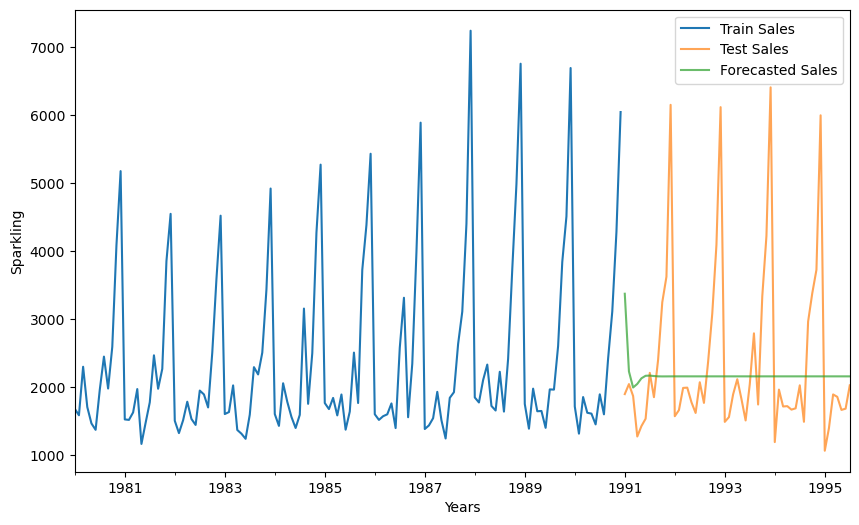

In [553]:
axis = train['Sparkling'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Sparkling'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()
plt.close()

In [554]:
resultsDf_8 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best AR Model : ARIMA(2,0,0)'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE,RMSE
RegressionOnTime,1389.135175,NaN
NaiveModel,3864.279352,NaN
SimpleAverageModel,1275.081804,NaN
2pointTrailingMovingAverage,813.400684,NaN
4pointTrailingMovingAverage,1156.589694,NaN
6pointTrailingMovingAverage,1283.927428,NaN
9pointTrailingMovingAverage,1346.278315,NaN
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674,NaN
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2007.238526,NaN
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",406.510170,NaN


# ARMA Model

ARMA Model building to estimate best 'p' , 'q' ( Lowest AIC Approach )

In [555]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

,param,AIC


In [556]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_arma:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:-96.55375139043092
ARIMA(1, 0, 2) - AIC:-95.99972488280548
ARIMA(1, 0, 3) - AIC:-102.09622426226466
ARIMA(2, 0, 1) - AIC:-106.95537062529385
ARIMA(2, 0, 2) - AIC:-95.53751052387858
ARIMA(2, 0, 3) - AIC:-130.6110777287242
ARIMA(3, 0, 1) - AIC:-93.60604376662405
ARIMA(3, 0, 2) - AIC:-103.19712607988748
ARIMA(3, 0, 3) - AIC:-136.42947931941438


In [557]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
8,"(3, 0, 3)",-136.429479
5,"(2, 0, 3)",-130.611078
3,"(2, 0, 1)",-106.955371
7,"(3, 0, 2)",-103.197126
2,"(1, 0, 3)",-102.096224


Building ARMA model with best p,q parameter 

In [558]:
best_model = ARIMA(train_sales_ts_log,order = (3,0,3))
best_results = best_model.fit()

In [559]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 0, 3)   Log Likelihood                  76.215
Date:                Fri, 25 Aug 2023   AIC                           -136.429
Time:                        12:19:57   BIC                           -113.367
Sample:                    01-01-1980   HQIC                          -127.058
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3342      0.010    331.934      0.000       3.314       3.354
ar.L1          0.7373      0.384      1.921      0.055      -0.015       1.489
ar.L2          0.7244      0.662      1.095      0.2

Calculating RMSE for best ARIMA model

In [560]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-01-01'), dynamic=True, full_results=True)

In [561]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values

In [562]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [563]:
# Compute the root mean square error
mse = ((testCopy1['Sparkling'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 940.769


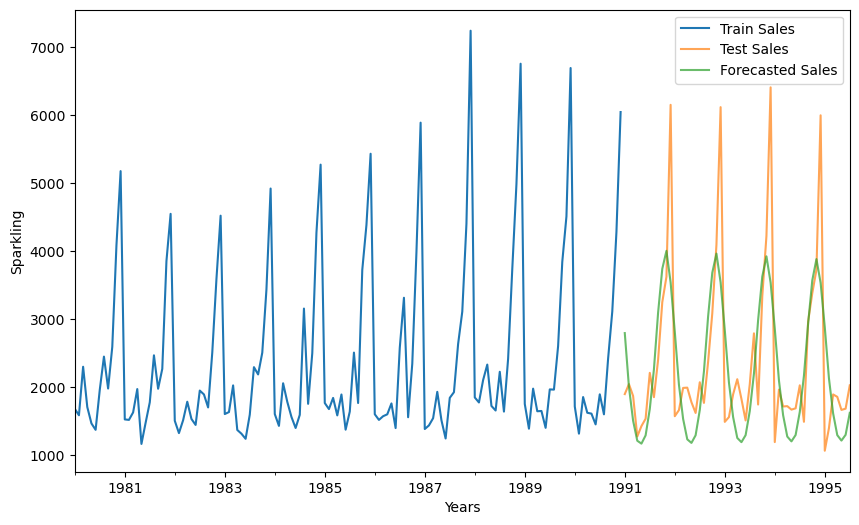

In [564]:
axis = train['Sparkling'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Sparkling'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()
plt.close()

In [565]:
resultsDf_9 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best ARMA Model : ARIMA(3,0,3)'])


resultsDf=pd.concat([resultsDf,resultsDf_9])
resultsDf

,Test RMSE,RMSE
RegressionOnTime,1389.135175,NaN
NaiveModel,3864.279352,NaN
SimpleAverageModel,1275.081804,NaN
2pointTrailingMovingAverage,813.400684,NaN
4pointTrailingMovingAverage,1156.589694,NaN
6pointTrailingMovingAverage,1283.927428,NaN
9pointTrailingMovingAverage,1346.278315,NaN
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674,NaN
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2007.238526,NaN
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",406.510170,NaN


# ARIMA Model building to estimate best 'p' , 'd' , 'q' paramters ( Lowest AIC Approach )

In [566]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [567]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:-96.55375139043092
ARIMA(1, 0, 2) - AIC:-95.99972488280548
ARIMA(1, 0, 3) - AIC:-102.09622426226466
ARIMA(1, 1, 1) - AIC:-87.99715481580243
ARIMA(1, 1, 2) - AIC:-91.00638159243181
ARIMA(1, 1, 3) - AIC:-90.44561356283505
ARIMA(2, 0, 1) - AIC:-106.95537062529385
ARIMA(2, 0, 2) - AIC:-95.53751052387858
ARIMA(2, 0, 3) - AIC:-130.6110777287242
ARIMA(2, 1, 1) - AIC:-91.85382158107731
ARIMA(2, 1, 2) - AIC:-98.901482947836
ARIMA(2, 1, 3) - AIC:-95.4827287819758
ARIMA(3, 0, 1) - AIC:-93.60604376662405
ARIMA(3, 0, 2) - AIC:-103.19712607988748
ARIMA(3, 0, 3) - AIC:-136.42947931941438
ARIMA(3, 1, 1) - AIC:-66.69144090656341
ARIMA(3, 1, 2) - AIC:-100.0785674600522
ARIMA(3, 1, 3) - AIC:-116.36872287883972


In [568]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
14,"(3, 0, 3)",-136.429479
8,"(2, 0, 3)",-130.611078
17,"(3, 1, 3)",-116.368723
6,"(2, 0, 1)",-106.955371
13,"(3, 0, 2)",-103.197126


Building ARIMA model with best parameters p,d,q

In [569]:
best_model = ARIMA(train_sales_ts_log,order = (3,0,3))
best_results = best_model.fit()

In [570]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 0, 3)   Log Likelihood                  76.215
Date:                Fri, 25 Aug 2023   AIC                           -136.429
Time:                        12:20:00   BIC                           -113.367
Sample:                    01-01-1980   HQIC                          -127.058
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3342      0.010    331.934      0.000       3.314       3.354
ar.L1          0.7373      0.384      1.921      0.055      -0.015       1.489
ar.L2          0.7244      0.662      1.095      0.2

Calculating RMSE for best ARIMA model 

In [571]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-01-01'), dynamic=True, full_results=True)

In [572]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values

In [573]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [574]:
# Compute the root mean square error
mse = ((testCopy1['Sparkling'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 940.769


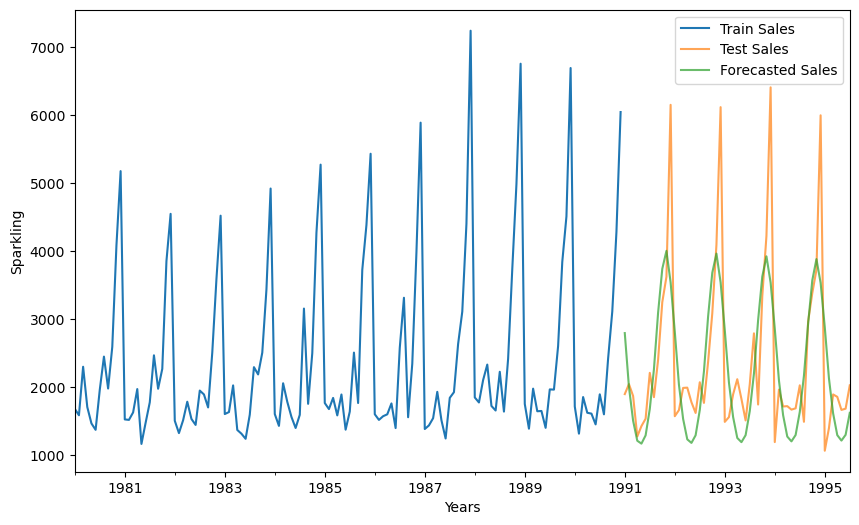

In [575]:
axis = train['Sparkling'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Sparkling'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()
plt.close()

In [576]:
resultsDf_10 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best ARIMA Model : ARIMA(3,0,3)'])

resultsDf=pd.concat([resultsDf,resultsDf_10])
resultsDf

,Test RMSE,RMSE
RegressionOnTime,1389.135175,NaN
NaiveModel,3864.279352,NaN
SimpleAverageModel,1275.081804,NaN
2pointTrailingMovingAverage,813.400684,NaN
4pointTrailingMovingAverage,1156.589694,NaN
6pointTrailingMovingAverage,1283.927428,NaN
9pointTrailingMovingAverage,1346.278315,NaN
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674,NaN
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2007.238526,NaN
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",406.510170,NaN


# SARIMA Model

Finding Seasonality = 12 from ACF/PACF plots

In [577]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

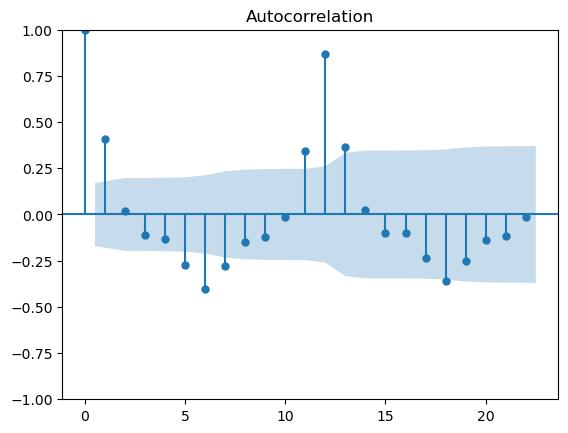

In [578]:
plot_acf(train['Sparkling'],alpha=0.05);

SARIMA Model building to estimate best parameters 

In [579]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [580]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [581]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:-290.9515387409576
SARIMA(1, 0, 1)x(1, 0, 2, 12) - AIC:-254.40539365868693
SARIMA(1, 0, 1)x(1, 0, 3, 12) - AIC:3019.430569076799
SARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:-252.01809807459682
SARIMA(1, 0, 1)x(1, 1, 2, 12) - AIC:-220.30186491007296
SARIMA(1, 0, 1)x(1, 1, 3, 12) - AIC:3657.133084319047
SARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:-254.43015419440565
SARIMA(1, 0, 1)x(2, 0, 2, 12) - AIC:-253.34188357317936
SARIMA(1, 0, 1)x(2, 0, 3, 12) - AIC:2680.47407821962
SARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:-221.6800701980316
SARIMA(1, 0, 1)x(2, 1, 2, 12) - AIC:-217.15786290762725
SARIMA(1, 0, 1)x(2, 1, 3, 12) - AIC:3648.344859924336
SARIMA(1, 0, 1)x(3, 0, 1, 12) - AIC:-221.27820069809894
SARIMA(1, 0, 1)x(3, 0, 2, 12) - AIC:-220.0419717970859
SARIMA(1, 0, 1)x(3, 0, 3, 12) - AIC:2789.9146179509494
SARIMA(1, 0, 1)x(3, 1, 1, 12) - AIC:-188.4057745287654
SARIMA(1, 0, 1)x(3, 1, 2, 12) - AIC:-187.20753182913776
SARIMA(1, 0, 1)x(3, 1, 3, 12) - AIC:3695.6521525671988
SARIMA(

SARIMA(2, 0, 3)x(1, 1, 3, 12) - AIC:78.07374200769931
SARIMA(2, 0, 3)x(2, 0, 1, 12) - AIC:-249.2466511470672
SARIMA(2, 0, 3)x(2, 0, 2, 12) - AIC:-244.25591172170022
SARIMA(2, 0, 3)x(2, 0, 3, 12) - AIC:2447.2358592880405
SARIMA(2, 0, 3)x(2, 1, 1, 12) - AIC:-214.51949258527827
SARIMA(2, 0, 3)x(2, 1, 2, 12) - AIC:-210.53015149919236
SARIMA(2, 0, 3)x(2, 1, 3, 12) - AIC:3544.9228106290843
SARIMA(2, 0, 3)x(3, 0, 1, 12) - AIC:-220.5013355526436
SARIMA(2, 0, 3)x(3, 0, 2, 12) - AIC:-211.36350354171552
SARIMA(2, 0, 3)x(3, 0, 3, 12) - AIC:2554.3820193871265
SARIMA(2, 0, 3)x(3, 1, 1, 12) - AIC:-180.3252902643814
SARIMA(2, 0, 3)x(3, 1, 2, 12) - AIC:-178.32725052853112
SARIMA(2, 0, 3)x(3, 1, 3, 12) - AIC:3582.3336598144097
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:-278.2882311317367
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:-241.07884896909508
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3660.6553207277393
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:-243.4777933743954
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:-214.6815078986596
SARIM

SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:-205.01758345879657
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:-206.24242872378267
SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:2565.2133356083605
SARIMA(3, 1, 2)x(3, 1, 1, 12) - AIC:-173.17375099984656
SARIMA(3, 1, 2)x(3, 1, 2, 12) - AIC:-171.1926397328949
SARIMA(3, 1, 2)x(3, 1, 3, 12) - AIC:3938.3701098195866
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:-273.3350013416333
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:-237.12547804782542
SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3519.9320549422278
SARIMA(3, 1, 3)x(1, 1, 1, 12) - AIC:-238.41046215556645
SARIMA(3, 1, 3)x(1, 1, 2, 12) - AIC:-207.5758427945653
SARIMA(3, 1, 3)x(1, 1, 3, 12) - AIC:4231.170082534979
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:-237.0635824242528
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:-238.66195139795394
SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3386.532627681398
SARIMA(3, 1, 3)x(2, 1, 1, 12) - AIC:-208.04293192093883
SARIMA(3, 1, 3)x(2, 1, 2, 12) - AIC:-203.70845419693407
SARIMA(3, 1, 3)x(2, 1, 3, 12) - AIC:4169.230203009283
SARIM

In [582]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

,param,seasonal,AIC
0,"(1, 0, 1)","(1, 0, 1, 12)",-290.951539
108,"(2, 0, 1)","(1, 0, 1, 12)",-289.035099
18,"(1, 0, 2)","(1, 0, 1, 12)",-287.511663
126,"(2, 0, 2)","(1, 0, 1, 12)",-286.744019
216,"(3, 0, 1)","(1, 0, 1, 12)",-286.392349


Building SARIMA model with the best parameters 

In [583]:
best_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                      order=(1, 0, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [584]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 149.456
Date:                            Fri, 25 Aug 2023   AIC                           -288.911
Time:                                    12:29:38   BIC                           -274.497
Sample:                                01-01-1980   HQIC                          -283.054
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.001   1529.075      0.000       0.998       1.001
ma.L1         -0.9792      0.023   

In [585]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-01-01'), dynamic=True, full_results=True)

In [586]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)

In [587]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [588]:
testCopy

,Sparkling,sales_ts_forecasted
YearMonth,,
1991-01-01,1902,1742.889457
1991-02-01,2049,1479.541769
1991-03-01,1874,1916.630169
1991-04-01,1279,1788.257055
1991-05-01,1432,1678.052760
1991-06-01,1540,1482.110409
1991-07-01,2214,2007.107696
1991-08-01,1857,1899.485700
1991-09-01,2408,2404.503573


In [589]:
# Compute the root mean square error
mse = ((testCopy['Sparkling'] - testCopy['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 310.667


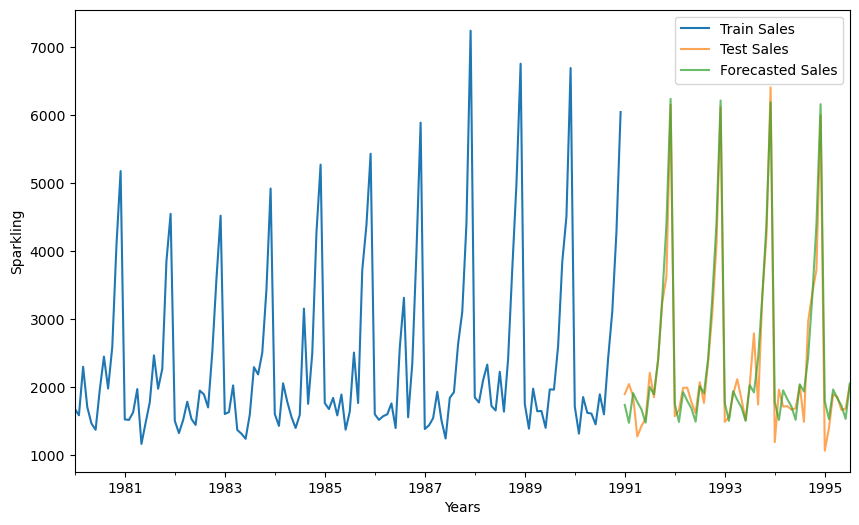

In [590]:
axis = train['Sparkling'].plot(label='Train Sales', figsize=(10, 6))
testCopy['Sparkling'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()
plt.close()

In [591]:
resultsDf_11 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best SARIMA Model : SARIMAX(1, 0, 1)x(1, 0, 1, 12)'])

resultsDf=pd.concat([resultsDf,resultsDf_11])
resultsDf

,Test RMSE,RMSE
RegressionOnTime,1389.135175,NaN
NaiveModel,3864.279352,NaN
SimpleAverageModel,1275.081804,NaN
2pointTrailingMovingAverage,813.400684,NaN
4pointTrailingMovingAverage,1156.589694,NaN
6pointTrailingMovingAverage,1283.927428,NaN
9pointTrailingMovingAverage,1346.278315,NaN
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674,NaN
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2007.238526,NaN
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",406.510170,NaN


# 7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [592]:
resultsDf

,Test RMSE,RMSE
RegressionOnTime,1389.135175,NaN
NaiveModel,3864.279352,NaN
SimpleAverageModel,1275.081804,NaN
2pointTrailingMovingAverage,813.400684,NaN
4pointTrailingMovingAverage,1156.589694,NaN
6pointTrailingMovingAverage,1283.927428,NaN
9pointTrailingMovingAverage,1346.278315,NaN
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674,NaN
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2007.238526,NaN
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",406.510170,NaN


# 8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands

Building the most optimum model on the Full Data.

In [593]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood               -1258.196
Date:                           Fri, 25 Aug 2023   AIC                           2530.391
Time:                                   12:29:39   BIC                           2552.383
Sample:                               01-01-1980   HQIC                          2539.315
                                    - 07-01-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9478      0.106     -8.973      0.000      -1.155      -0.741
ma.L2         -0.1247      0.087     -1.441

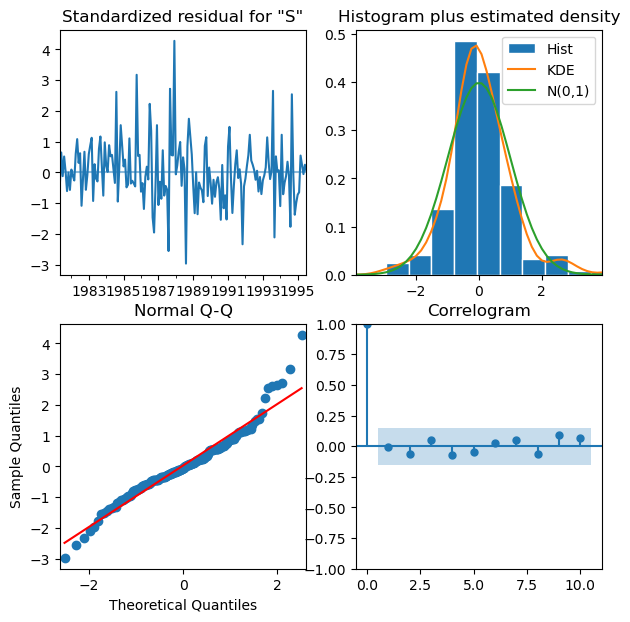

In [637]:
results_full_data_model.plot_diagnostics(figsize=(7,7));

# Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [595]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [596]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05)

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1864.148431,372.568706,1133.927186,2594.369676
1995-09-01,2393.393987,378.429822,1651.685165,3135.102810
1995-10-01,3285.344433,379.279896,2541.969496,4028.719369
1995-11-01,4017.465623,380.128074,3272.428288,4762.502958
1995-12-01,6286.079512,380.974370,5539.383468,7032.775557
1996-01-01,1221.239261,381.818795,472.888174,1969.590348
1996-02-01,1544.780530,381.951436,796.169472,2293.391589
1996-03-01,1777.942297,382.622668,1028.015648,2527.868947
1996-04-01,1781.237598,383.395817,1029.795606,2532.679591
1996-05-01,1665.480225,384.167416,912.525925,2418.434524


In [597]:
from sklearn.metrics import  mean_squared_error

In [598]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 531.9778460623984


In [599]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

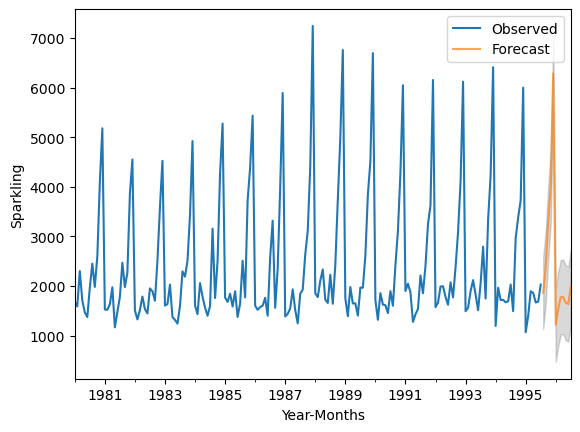

In [600]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

In [601]:
resultsDf

,Test RMSE,RMSE
RegressionOnTime,1389.135175,NaN
NaiveModel,3864.279352,NaN
SimpleAverageModel,1275.081804,NaN
2pointTrailingMovingAverage,813.400684,NaN
4pointTrailingMovingAverage,1156.589694,NaN
6pointTrailingMovingAverage,1283.927428,NaN
9pointTrailingMovingAverage,1346.278315,NaN
"Alpha=0.995,SimpleExponentialSmoothing",1316.034674,NaN
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",2007.238526,NaN
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",406.510170,NaN
